 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
file_path = Path("../Starter_Code/Resources/whale_returns.csv")
whale_returns = pd.read_csv(file_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns= whale_returns.dropna().copy()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
file_path = Path("../Starter_Code/Resources/algo_returns.csv")
algo_returns = pd.read_csv(file_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [6]:
# Count nulls
algo_returns.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()

algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
file_path = Path("../Starter_Code/Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(file_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_history.sort_index(ascending = True, inplace = True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp_tsx_history["Close"]= sp_tsx_history["Close"].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')
sp_tsx_history.sort_index(inplace = True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [11]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_history.pct_change()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [12]:
# Drop nulls
sp_tsx_daily_returns = sp_tsx_daily_returns.dropna().copy()


In [13]:
sp_tsx_daily_returns.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename `Close` Column to be specific to this portfolio.
#sp_tsx_daily_returns.rename(columns={"Close":"S&P TSX 60"})
sp_tsx_daily_returns.rename(columns={"Close":"S&P TSX 60"}, inplace = True)


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
df_daily = pd.concat([whale_returns, algo_returns,sp_tsx_daily_returns], axis = "columns",join = "inner").dropna()
df_daily.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

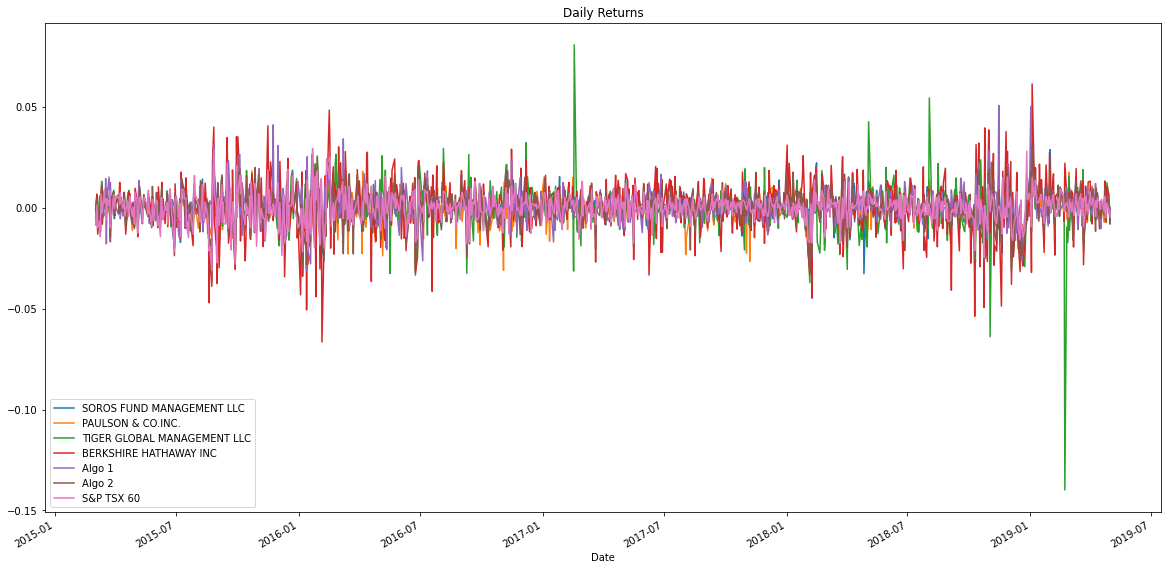

In [16]:
# Plot daily returns of all portfolios
df_daily.plot(figsize = (20,10), title='Daily Returns')

#### Calculate and Plot cumulative returns.

In [17]:
# Calculate cumulative returns of all portfolios
df_cum = (1+ df_daily).cumprod()
df_cum.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


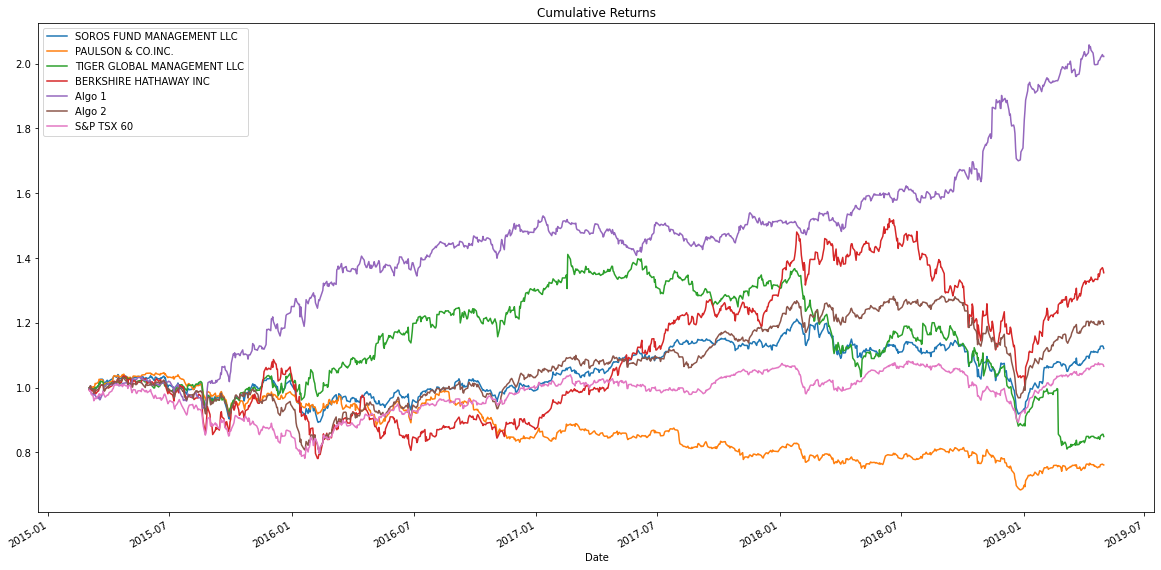

In [54]:
# Plot cumulative returns
df_cum.plot(figsize = (20,10), title='Cumulative Returns')

In [19]:
print(f"SOROS FUND MANAGEMENT LLC,BERKSHIRE HATHAWAY INC, Algo 1 and Algo 2 outperform the S&P TSX 60.")

SOROS FUND MANAGEMENT LLC,BERKSHIRE HATHAWAY INC, Algo 1 and Algo 2 outperform the S&P TSX 60.


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P TSX 60
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


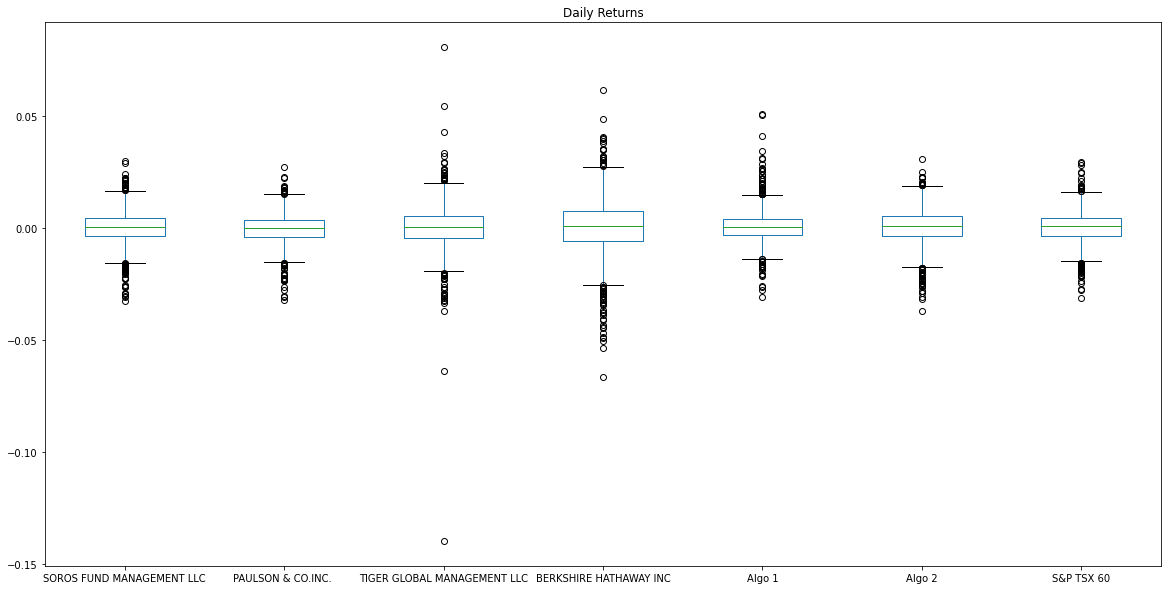

In [55]:
# Box plot to visually show risk
df_daily.plot(kind="box", figsize = (20,10), title='Daily Returns')

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
df_daily_std = pd.DataFrame({'std':df_daily.std()})
df_daily_std.sort_values('std')

,std
PAULSON & CO.INC.,0.006982
S&P TSX 60,0.007034
Algo 1,0.007589
SOROS FUND MANAGEMENT LLC,0.007828
Algo 2,0.008326
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826


### Determine which portfolios are riskier than the S&P TSX 60

In [22]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60
higher_std = df_daily_std[df_daily_std['std'] > df_daily_std.loc["S&P TSX 60",'std']]
higher_std.sort_values('std')


,std
Algo 1,0.007589
SOROS FUND MANAGEMENT LLC,0.007828
Algo 2,0.008326
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826


In [23]:
print(f"Algo 1, SOROS FUND MANAGEMENT LLC, Algo 2, TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are riskier than the S&P TSX 60.")

Algo 1, SOROS FUND MANAGEMENT LLC, Algo 2, TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are riskier than the S&P TSX 60.


### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std = df_annualized_std.rename(columns={'std': 'Annual std'})
df_annualized_std.sort_values('Annual std')

,Annual std
PAULSON & CO.INC.,0.110841
S&P TSX 60,0.111664
Algo 1,0.120470
SOROS FUND MANAGEMENT LLC,0.124259
Algo 2,0.132177
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60
3. Calculate and plot a 60-day Beta for Berkshire Hathaway Inc compared to the S&P 60 TSX

### Calculate and plot rolling `std` for all portfolios with 21-day window

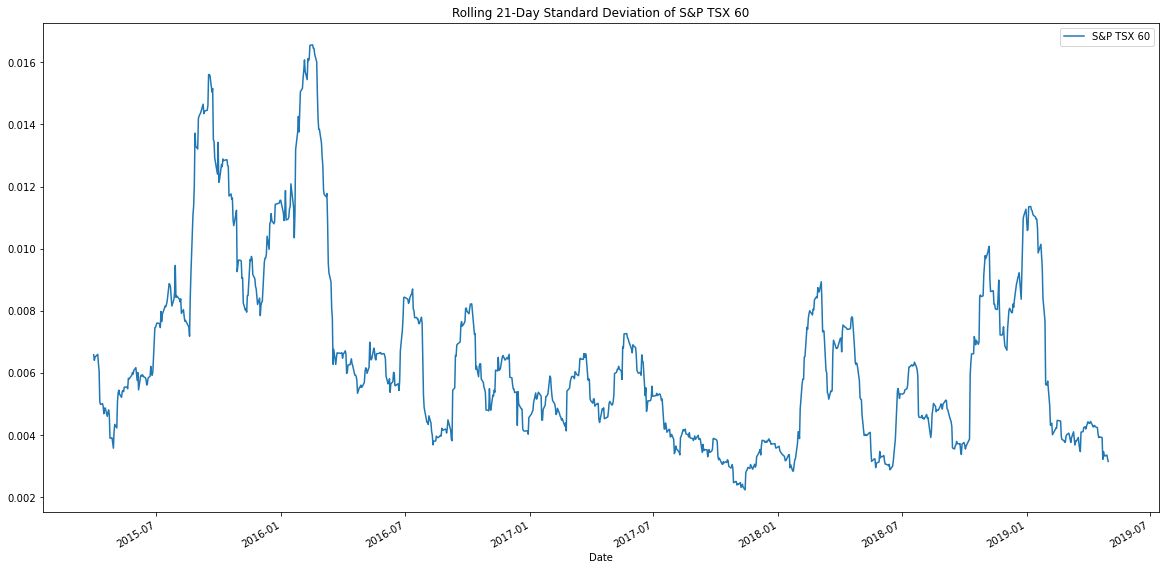

In [61]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp_tsx60_rolling_21 = df_daily[["S&P TSX 60"]].rolling(window = 21).std().dropna()
# Plot the rolling standard deviation
sp_tsx60_rolling_21.plot(figsize = (20,10), title='Rolling 21-Day Standard Deviation of S&P TSX 60')

### Calculate and plot the correlation

In [62]:
correlation_sp_tsx60 = pd.DataFrame(df_daily.corr()).copy()
correlation_sp_tsx60

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


In [63]:
correlation_sp_tsx60 =correlation_sp_tsx60.loc[:,"S&P TSX 60"]
mimic_SP = correlation_sp_tsx60[correlation_sp_tsx60==correlation_sp_tsx60[correlation_sp_tsx60<1].max()]
mimic_SP
print(f"Algo 2 best mimic S&P TSX 60 since it has the highest correlation to S&P TSX 60.")

Algo 2 best mimic S&P TSX 60 since it has the highest correlation to S&P TSX 60.


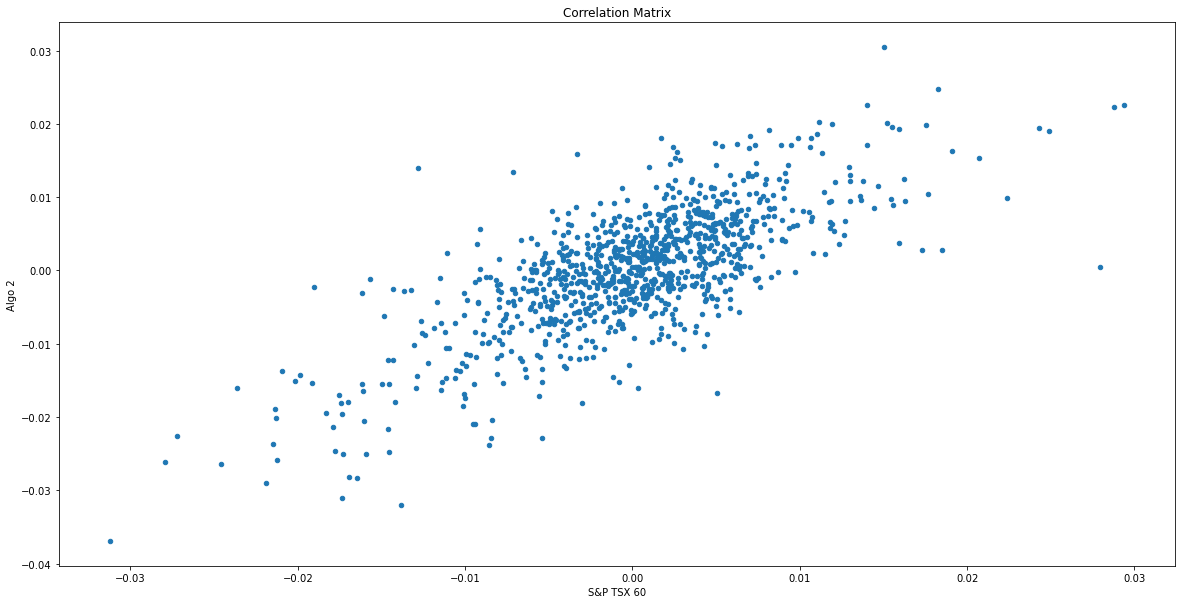

In [64]:
# Display de correlation matrix
df_daily.plot(kind="scatter", y = "Algo 2", x = "S&P TSX 60", figsize = (20,10), title='Correlation Matrix')

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

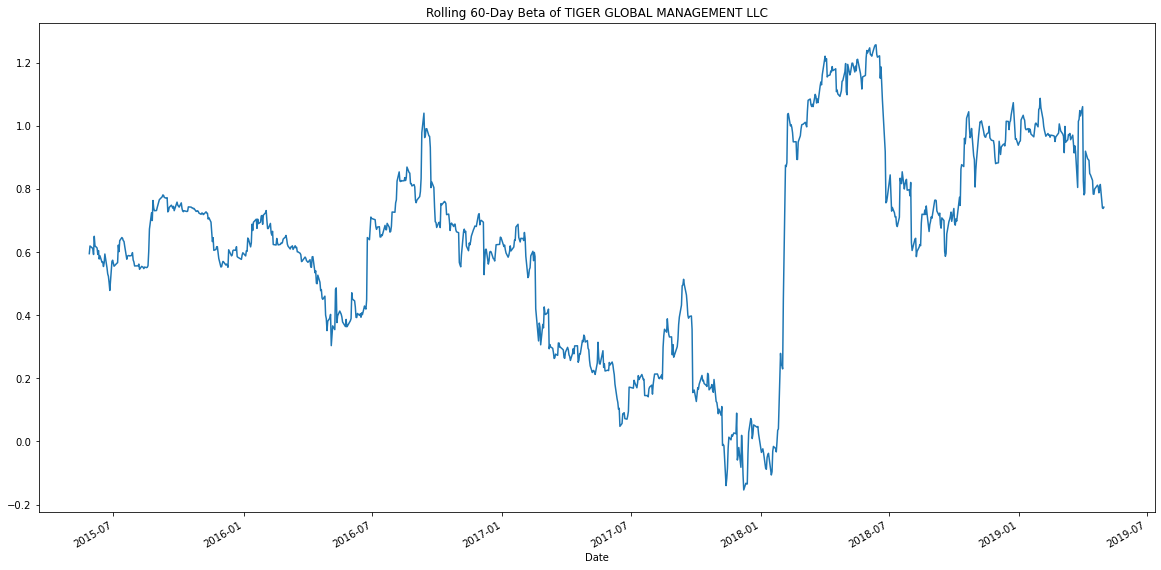

In [65]:
# Calculate covariance of a single portfolio
rolling_covariance = df_daily['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(df_daily['S&P TSX 60'])
# Calculate variance of S&P TSX
rolling_variance = df_daily['S&P TSX 60'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of TIGER GLOBAL MANAGEMENT LLC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

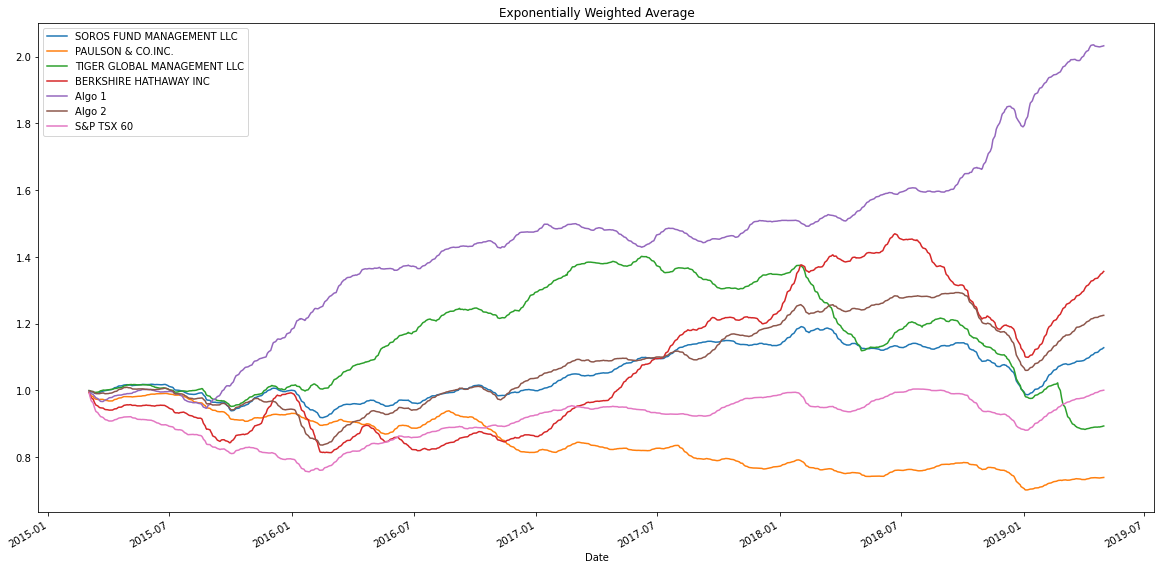

In [66]:
# Use `ewm` to calculate the rolling window

df_daily_ewm = df_daily.ewm(span = 21,adjust = False).mean()
(1+df_daily_ewm).cumprod().plot(figsize = (20,10), title='Exponentially Weighted Average')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [67]:
# Annualized Sharpe Ratios
sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

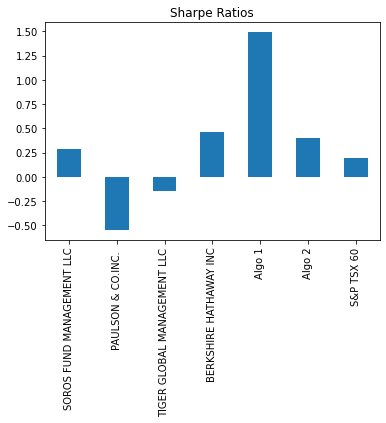

In [68]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [33]:
print("Algo 1 outperformed market and whales portfolios while Algo 2 outperformed market but fell below BERKSHIRE HATHAWAY INC.")

Algo 1 outperformed market and whales portfolios while Algo 2 outperformed market but fell below BERKSHIRE HATHAWAY INC.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

Minh's portfolio will fetch data from three companies listed mixed in NYSE and NASDAQ.

* `AMD` - [Advanced Micro Devices](https://en.wikipedia.org/wiki/Advanced_Micro_Devices)

* `CMG` - [Chipotle Mexican Grill](https://en.wikipedia.org/wiki/Chipotle_Mexican_Grill)

* `NFLX` - [Netflix](https://en.wikipedia.org/wiki/Netflix)

In [34]:
# Reading data from 1st stock
AMD_price = pd.read_csv(Path("../Starter_Code/Resources/AMD_StockPrice.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
AMD_price.rename(columns = {"Close":"AMD"})
AMD_price.sort_index(ascending = True, inplace = True)
AMD_price.head()

,Close
Date,
2018-01-02 16:00:00,13.25
2018-01-03 16:00:00,11.90
2018-01-05 16:00:00,11.13
2018-01-06 16:00:00,14.40
2018-01-08 16:00:00,18.48


In [35]:
# Reading data from 2nd stock
CMG_price = pd.read_csv(Path("../Starter_Code/Resources/CMG_StockPrice.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
CMG_price.rename(columns = {"Close":"CMG"}, inplace = True)
CMG_price.sort_index().head()

,CMG
Date,
2018-01-02 16:00:00,314.72
2018-01-03 16:00:00,313.26
2018-01-05 16:00:00,426.01
2018-01-06 16:00:00,438.62
2018-01-08 16:00:00,442.63


In [36]:
# Reading data from 3rd stock
NFLX_price = pd.read_csv(Path("../Starter_Code/Resources/NFLX_StockPrice.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
NFLX_price.rename(columns = {"Close":"NFLX"}, inplace = True)#.drop(["Symbol"])
NFLX_price.sort_index().head()

,NFLX
Date,
2018-01-02 16:00:00,265.07
2018-01-03 16:00:00,290.39
2018-01-05 16:00:00,313.30
2018-01-06 16:00:00,359.93
2018-01-08 16:00:00,338.38


In [37]:
# Combine all stocks in a single DataFrame
Minh_portfolio = pd.concat((NFLX_price, CMG_price,AMD_price), axis = "columns", join= "inner")
#Minh_portfolio.sort_index(ascending = True, inplace = True)
Minh_portfolio.sort_index().head()

,NFLX,CMG,Close
Date,,,
2018-01-02 16:00:00,265.07,314.72,13.25
2018-01-03 16:00:00,290.39,313.26,11.90
2018-01-05 16:00:00,313.30,426.01,11.13
2018-01-06 16:00:00,359.93,438.62,14.40
2018-01-08 16:00:00,338.38,442.63,18.48


In [38]:
# Reset Date index
Minh_portfolio.index = Minh_portfolio.index.normalize()
Minh_portfolio.sort_index(ascending = True, inplace = True)
Minh_portfolio.head()

,NFLX,CMG,Close
Date,,,
2018-01-02,265.07,314.72,13.25
2018-01-03,290.39,313.26,11.90
2018-01-05,313.30,426.01,11.13
2018-01-06,359.93,438.62,14.40
2018-01-08,338.38,442.63,18.48


In [39]:
# Calculate daily returns
Minh_portfolio_daily_returns = Minh_portfolio.pct_change()

# Drop NAs
Minh_portfolio_daily_returns = Minh_portfolio_daily_returns.dropna()
# Display sample data
Minh_portfolio_daily_returns.sort_index().head()

,NFLX,CMG,Close
Date,,,
2018-01-03,0.095522,-0.004639,-0.101887
2018-01-05,0.078894,0.359925,-0.064706
2018-01-06,0.148835,0.029600,0.293801
2018-01-08,-0.059873,0.009142,0.283333
2018-01-10,0.127224,0.009805,0.700216


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
Minh_portfolio_returns = Minh_portfolio_daily_returns.dot(weights)
Minh_portfolio_returns.head()

Date
2018-01-03   -0.003668
2018-01-05    0.124704
2018-01-06    0.157412
2018-01-08    0.077534
2018-01-10    0.279082
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [41]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat([Minh_portfolio_returns, df_daily],  axis = "columns",join = "inner").dropna()
portfolio_returns.rename(columns = {0:"Minh_Portfolio"}, inplace = True)
portfolio_returns.sort_index().head()

,Minh_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,,
2018-01-03,-0.003668,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-05,0.124704,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.077534,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-10,0.279082,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.004368
2018-01-11,-0.155665,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.002400


In [42]:
portfolio_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 295 entries, 2018-01-03 to 2019-04-30
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Minh_Portfolio               295 non-null    float64
 1   SOROS FUND MANAGEMENT LLC    295 non-null    float64
 2   PAULSON & CO.INC.            295 non-null    float64
 3   TIGER GLOBAL MANAGEMENT LLC  295 non-null    float64
 4   BERKSHIRE HATHAWAY INC       295 non-null    float64
 5   Algo 1                       295 non-null    float64
 6   Algo 2                       295 non-null    float64
 7   S&P TSX 60                   295 non-null    float64
dtypes: float64(8)
memory usage: 20.7 KB


In [43]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns

,Minh_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,,
2018-01-03,-0.003668,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-05,0.124704,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.077534,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-10,0.279082,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.004368
2018-01-11,-0.155665,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.002400
...,...,...,...,...,...,...,...,...
2019-04-24,0.002613,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972
2019-04-25,-0.029504,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.007923,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized `std`
#portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std = portfolio_returns.std()
portfolio_annualized_std = portfolio_std*np.sqrt(252)
#portfolio_annualized_std = portfolio_annualized_std.rename(columns = {0:"std"})
portfolio_annualized_std.sort_values()

S&P TSX 60                     0.100254
PAULSON & CO.INC.              0.116029
Algo 1                         0.124066
Algo 2                         0.139581
SOROS FUND MANAGEMENT LLC      0.148734
TIGER GLOBAL MANAGEMENT LLC    0.219085
BERKSHIRE HATHAWAY INC         0.232461
Minh_Portfolio                 1.784505
dtype: float64

In [45]:
print(f"My portfolio is the riskiest in all portfolio.")

My portfolio is the riskiest in all portfolio.


### Calculate and plot rolling `std` with 21-day window

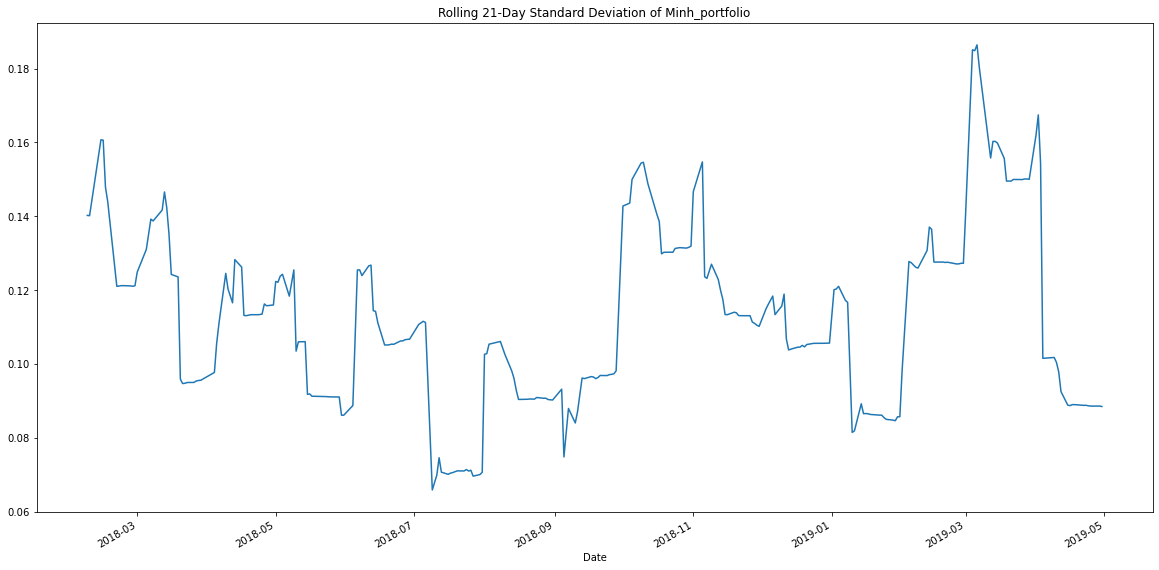

In [46]:
# Calculate rolling standard deviation
rolling_std_21 = portfolio_returns['Minh_Portfolio'].rolling(window=21).std()
# Plot rolling standard deviation
rolling_std_21.plot(figsize = (20,10), title = 'Rolling 21-Day Standard Deviation of Minh_portfolio')
#rolling_std.plot(figsize =(20,10))

### Calculate and plot the correlation

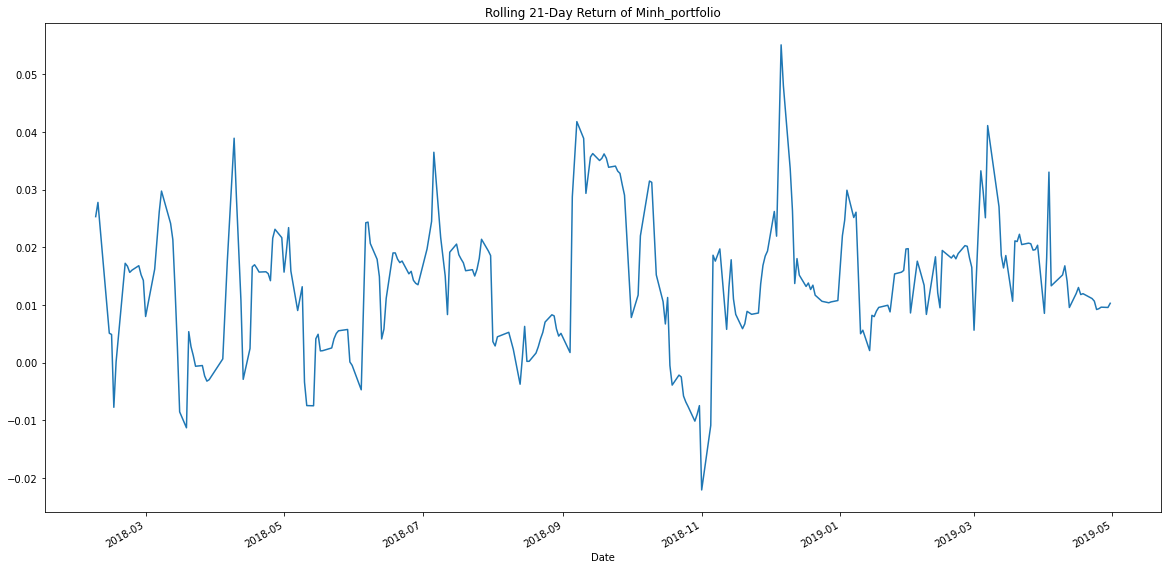

In [47]:
rolling_return_21 = portfolio_returns['Minh_Portfolio'].rolling(window=21).mean()
rolling_return_21.plot(figsize = (20,10), title = 'Rolling 21-Day Return of Minh_portfolio')

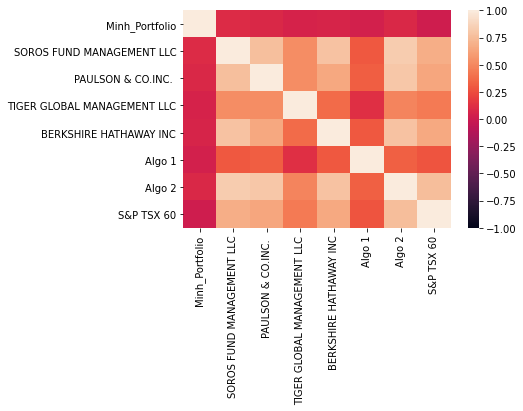

In [48]:
# Calculate and plot the correlation
Portfolio_correlation = portfolio_returns.corr()
Portfolio_correlation
sns.heatmap(Portfolio_correlation, vmin=-1, vmax=1)


### Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX

In [49]:
Minh_portfolio_covariance = portfolio_returns["Minh_Portfolio"].cov(portfolio_returns["S&P TSX 60"])
variance = portfolio_returns["S&P TSX 60"].var()
Minh_portfolio_beta = Minh_portfolio_covariance / variance
print(f"Minh_portfolio_covariance: {Minh_portfolio_covariance}")
print(f"S&P TSX 60 variance: {variance}")
print(f"Minh_portfolio_beta: {Minh_portfolio_beta}")

Minh_portfolio_covariance: 1.5987137914771584e-05
S&P TSX 60 variance: 3.988444687007728e-05
Minh_portfolio_beta: 0.4008363953710914


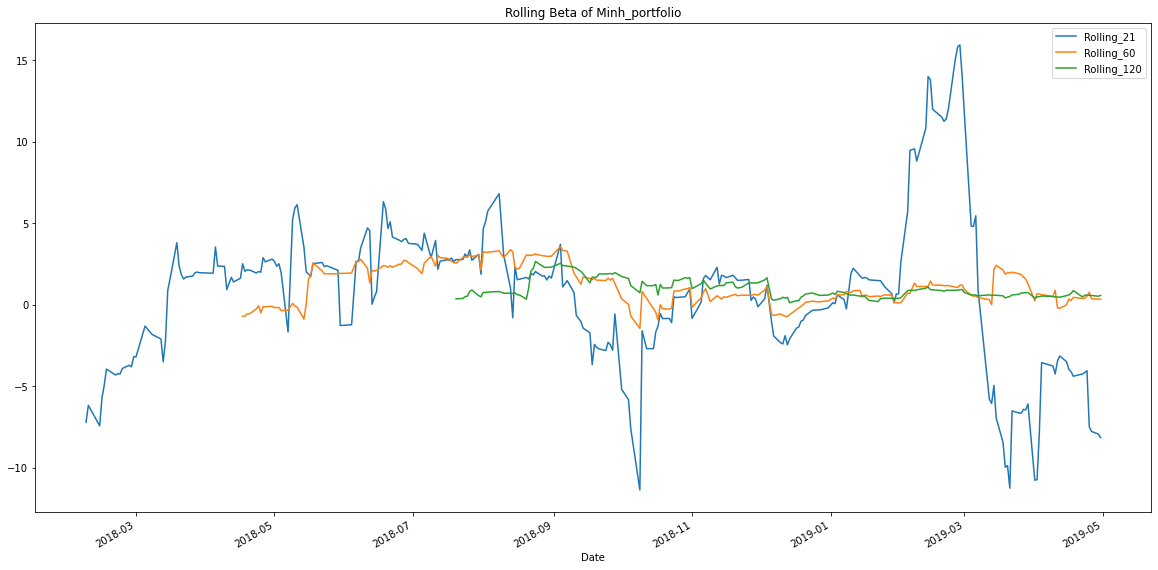

In [50]:
rolling21_Minh_portfolio_covariance = portfolio_returns["Minh_Portfolio"].rolling(window=21).cov(portfolio_returns["S&P TSX 60"])
rolling60_Minh_portfolio_covariance = portfolio_returns["Minh_Portfolio"].rolling(window=60).cov(portfolio_returns["S&P TSX 60"])
rolling120_Minh_portfolio_covariance = portfolio_returns["Minh_Portfolio"].rolling(window=120).cov(portfolio_returns["S&P TSX 60"])
rolling21_variance = portfolio_returns["S&P TSX 60"].rolling(window=21).var()
rolling60_variance = portfolio_returns["S&P TSX 60"].rolling(window=60).var()
rolling120_variance = portfolio_returns["S&P TSX 60"].rolling(window=120).var()
rolling21_Minh_portfolio_beta = rolling21_Minh_portfolio_covariance/rolling21_variance
rolling60_Minh_portfolio_beta = rolling60_Minh_portfolio_covariance/rolling60_variance
rolling120_Minh_portfolio_beta = rolling120_Minh_portfolio_covariance/rolling120_variance
ax = rolling21_Minh_portfolio_beta.plot(figsize = (20,10), title = 'Rolling Beta of Minh_portfolio')
rolling60_Minh_portfolio_beta.plot(ax = ax)
rolling120_Minh_portfolio_beta.plot(ax = ax)
ax.legend(['Rolling_21','Rolling_60','Rolling_120'])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Calculate Annualzied Sharpe Ratios
Annualzied_Sharpe_Ratios = (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252))
Annualzied_Sharpe_Ratios.sort_values()

TIGER GLOBAL MANAGEMENT LLC   -1.263958
PAULSON & CO.INC.             -0.634260
Algo 2                        -0.304796
SOROS FUND MANAGEMENT LLC     -0.190059
BERKSHIRE HATHAWAY INC        -0.044358
S&P TSX 60                    -0.032352
Algo 1                         1.877882
Minh_Portfolio                 1.904545
dtype: float64

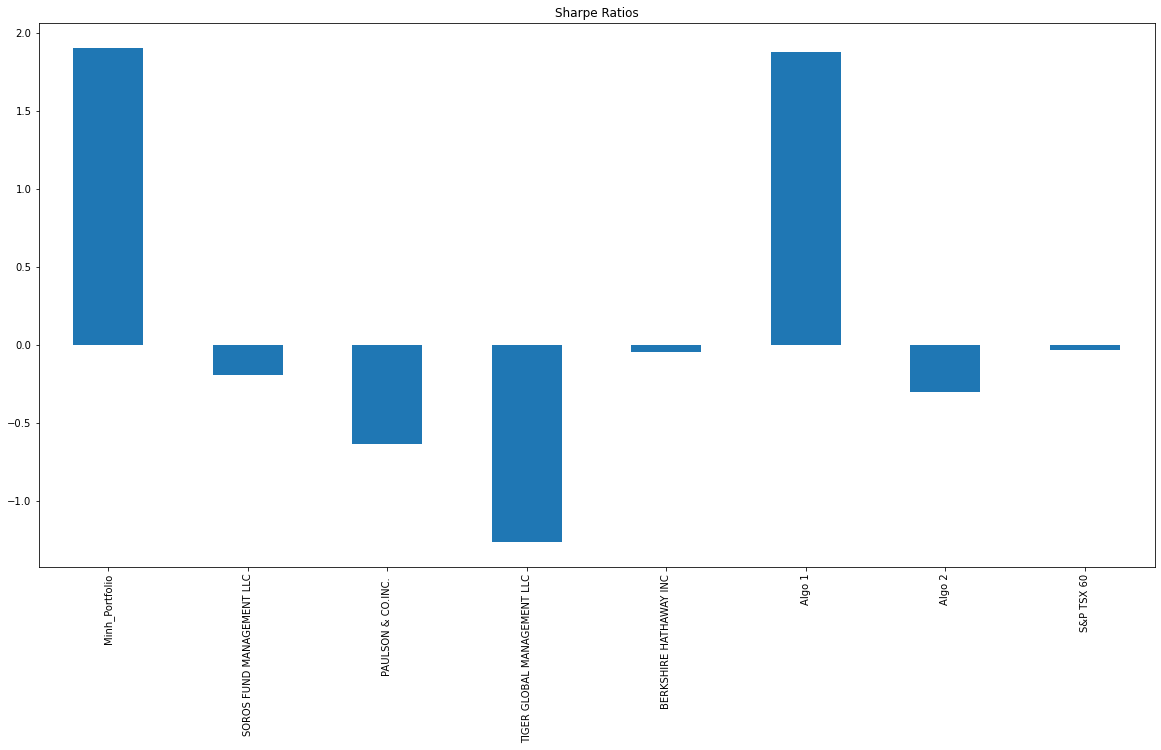

In [52]:
# Visualize the sharpe ratios as a bar plot
Annualzied_Sharpe_Ratios.plot(kind="bar", figsize = (20,10), title = "Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [53]:
print(f"Minh's portfolio outperforms all other portfolios in period of 2018 to May 2019.")

Minh's portfolio outperforms all other portfolios in period of 2018 to May 2019.
